In [1]:
from __future__ import print_function, division
from astropy.io import fits
from astropy.table import Table, Column
import ccdproc
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Bad pixel overview

In this notebook I'll take a look at what appear to be several bad pixels. While the results are useful for this night hopefully the techniques will be useful for other nights. Ideally we'd have a bad pixel map (whether as a list of pixels or a mask image).


In [2]:
ic = ccdproc.ImageFileCollection('.', keywords='*')

## The darks

There are 5 master darks of different exposure times in this set. We'll look at the master darks (as opposed to individual dark images) to try to keep the noise down. These masters were produced by subtracting bias from each of dark frames and then combining the darks by averaging.

In [3]:
master_dark_files = ic.files_filtered(imagetyp='dark', master=True)

In [4]:
print(master_dark_files)

['master_dark_exposure_1000.0.fit' 'master_dark_exposure_120.0.fit'
 'master_dark_exposure_240.0.fit' 'master_dark_exposure_30.0.fit'
 'master_dark_exposure_5.0.fit' 'master_dark_exposure_500.0.fit'
 'master_dark_exposure_60.0.fit']


## Histogram of pixel values for the 120 sec master dark

In [5]:
d120dat = fits.getdata(master_dark_files[0])
sigma = d120dat.std()
pixel_sigma = np.abs(d120dat/sigma)
print('Pixel standard deviation is {}'.format(sigma))

Pixel standard deviation is 155.95167541503906


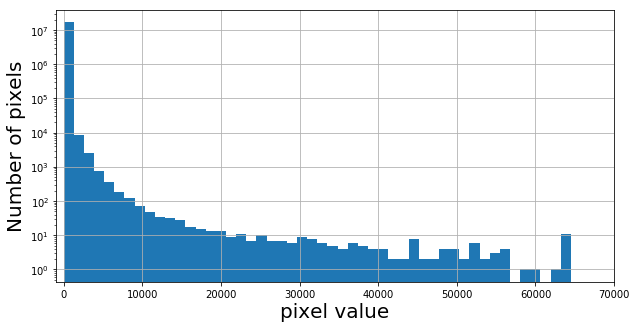

In [6]:
plt.figure(figsize=(10,5))
num, bins, patches = plt.hist(d120dat.flatten() , bins=50, log=True)
plt.xlabel('pixel value', size=20)
plt.ylabel('Number of pixels', size=20)
plt.xlim(-1000, 70000)
plt.grid()

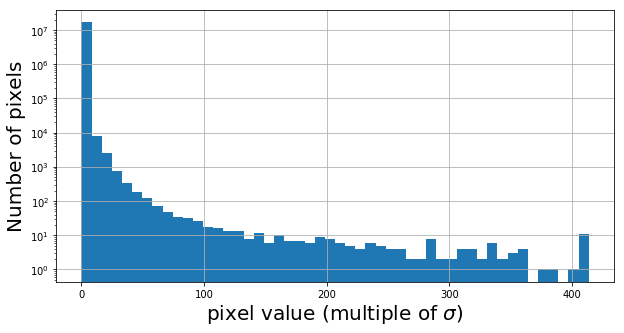

In [7]:
plt.figure(figsize=(10,5))
num, bins, patches = plt.hist(pixel_sigma.flatten(), bins=50, log=True)
plt.xlabel('pixel value (multiple of $\sigma$)', size=20)
plt.ylabel('Number of pixels', size=20)
plt.grid()

## Group pixels by standard deviation

It turns out to be convenient to group the pixels by number of standard deviations from the mean. The histogram below overlays those groupings with the original. The boundaries for grouping are somewhat arbitrary.

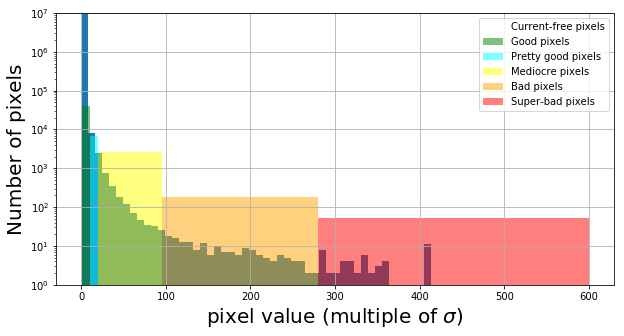

In [8]:
plt.figure(figsize=(10,5))
# plot the details
num, bins, patches = plt.hist(pixel_sigma.flatten(), bins=50, log=True)
# now the groupings
num, bins, patches = plt.hist(pixel_sigma.flatten(), bins=[0,1,10,20,95,280,600], log=True, alpha=0.5)
plt.xlabel('pixel value (multiple of $\sigma$)', size=20)
plt.ylabel('Number of pixels', size=20)
plt.grid()
plt.ylim(1, 10**7)
foo = patches[-1]
foo.set_facecolor('red')
foo.set_label('Super-bad pixels')
foo = patches[-2]
foo.set_facecolor('orange')
foo.set_label('Bad pixels')
foo = patches[-3]
foo.set_facecolor('yellow')
foo.set_label('Mediocre pixels')
foo = patches[-4]
foo.set_facecolor('cyan')
foo.set_label('Pretty good pixels')
foo = patches[-5]
foo.set_facecolor('green')
foo.set_label('Good pixels')
foo = patches[-6]
foo.set_facecolor('white')
foo.set_label('Current-free pixels')
foo.set_alpha(0.9)
plt.legend()
#plt.xlim(0,20)

In [9]:
bad_pixels = pixel_sigma > 10

## Locations of bad pixels

Area of each circle is proportional to the number of standard deviations it is from the mean. 

All pixels with a standard deviation larger than 10 are shown.

The *really bad* pixels are marked with a star.

In [10]:
superbad = pixel_sigma > 280
superbad_locs = np.argwhere(superbad)

(2048, 0)

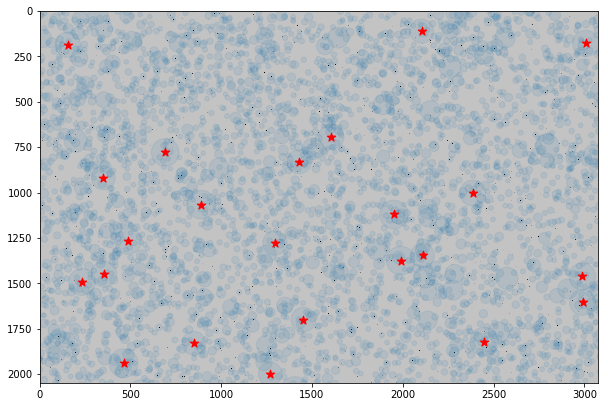

In [11]:
bad_coords = np.argwhere(bad_pixels)
plt.figure(figsize=(10,10))
plt.imshow(d120dat, cmap='gray_r',vmin=-3*sigma, vmax=10*sigma)
plt.scatter(bad_coords[:,1], bad_coords[:,0], s=pixel_sigma[bad_pixels]/100*200, alpha=0.1)
plt.scatter(superbad_locs[:, 1], superbad_locs[:, 0], marker='*', s=80, c='r')
plt.xlim(0,3073)
plt.ylim(2048, 0)